In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv(r"insurance.csv")

In [4]:
df=data.copy()

In [5]:
df.shape

(1338, 7)

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [7]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [8]:
df.duplicated().sum()

np.int64(1)

In [9]:
df.drop_duplicates(inplace=True)

<Axes: xlabel='expenses', ylabel='Density'>

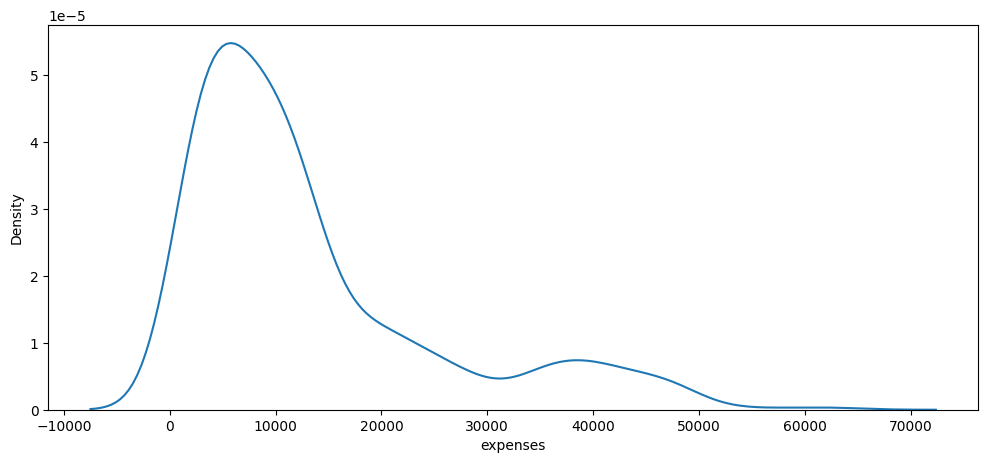

In [19]:
plt.figure(figsize=(12,5))
sns.kdeplot(df.expenses)

Text(0.5, 1.0, 'Region Vs Charges')

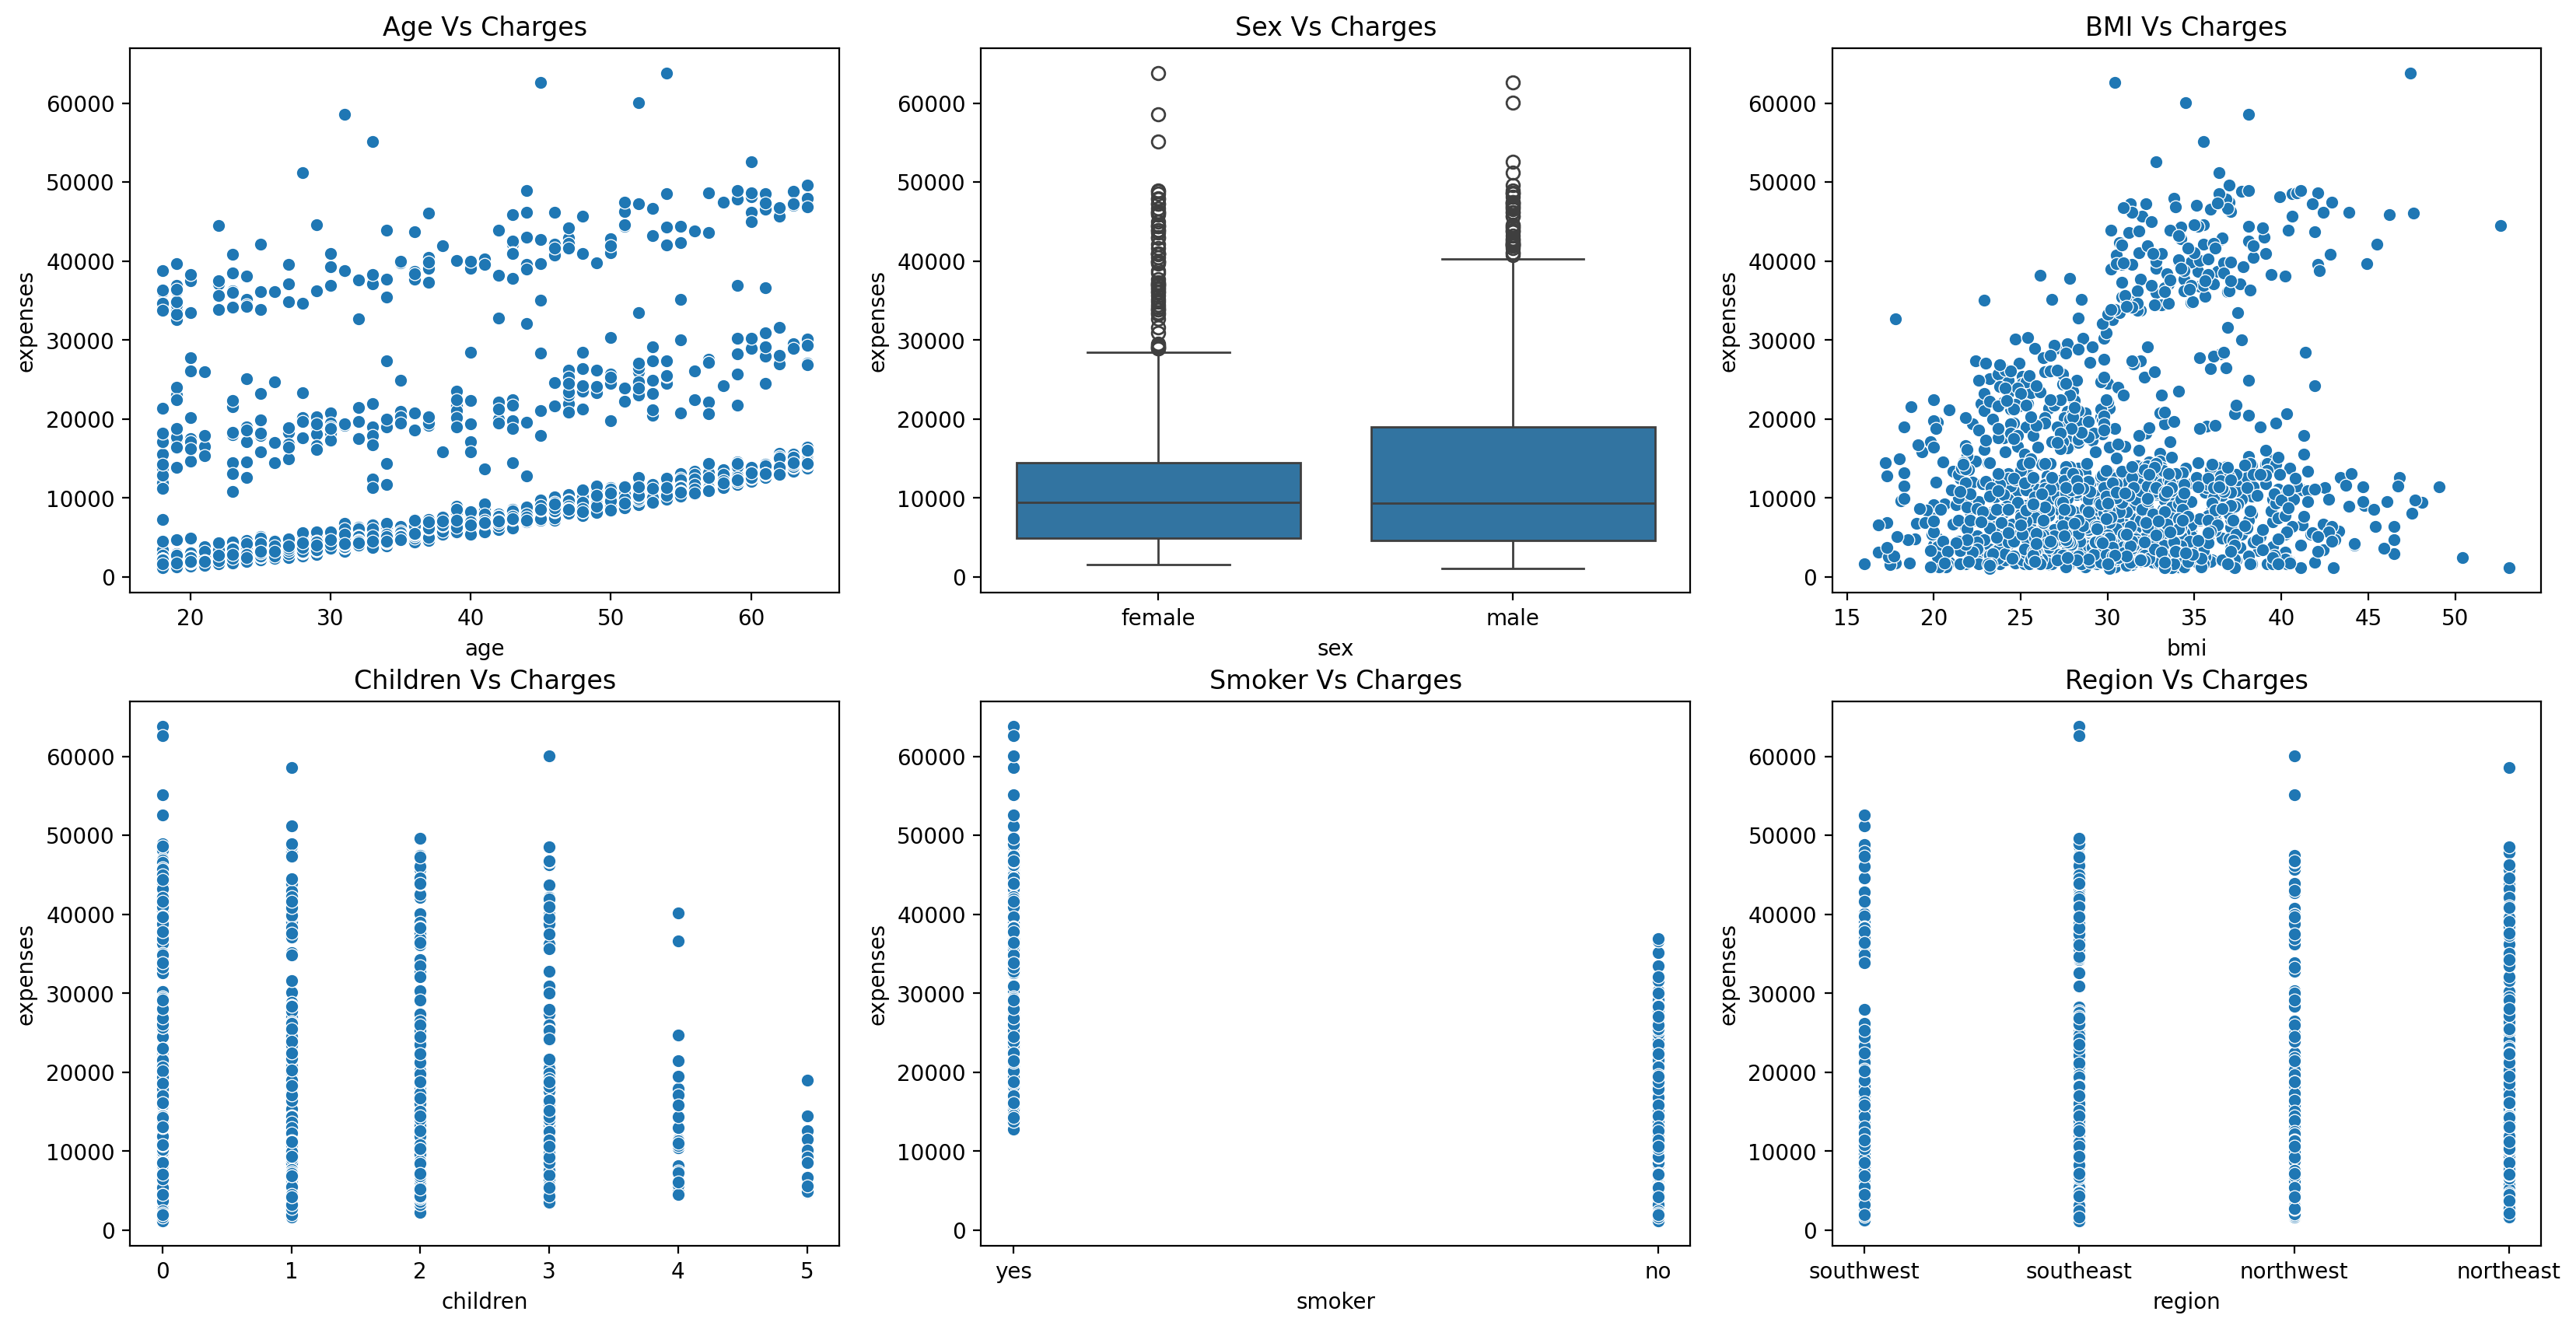

In [20]:
plt.figure(figsize = (20,10),dpi = 200)
plt.subplot(2,3,1)
sns.scatterplot(x = df.age,y = df.expenses)
plt.title('Age Vs Charges')
plt.subplot(2,3,2)
sns.boxplot(x = df.sex,y = df.expenses)
plt.title('Sex Vs Charges')
plt.subplot(2,3,3)
sns.scatterplot(x = df.bmi, y= df.expenses)
plt.title('BMI Vs Charges')
plt.subplot(2,3,4)
sns.scatterplot(x = df.children,y = df.expenses)
plt.title('Children Vs Charges')
plt.subplot(2,3,5)
sns.scatterplot(x = df.smoker,y = df.expenses)
plt.title('Smoker Vs Charges')
plt.subplot(2,3,6)
sns.scatterplot(x = df.region,y = df.expenses)
plt.title('Region Vs Charges')

<Axes: xlabel='bmi', ylabel='Density'>

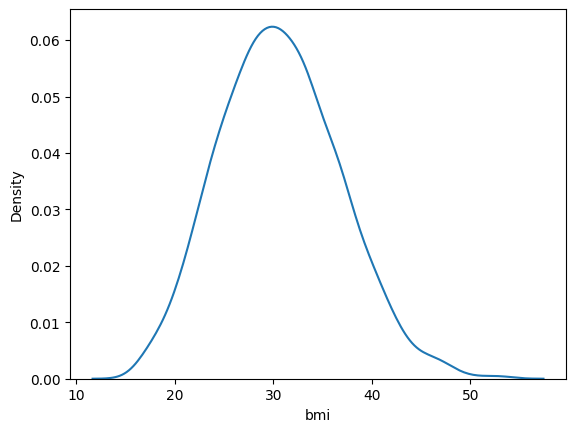

In [21]:
sns.kdeplot(data.bmi)

In [22]:
df[df.bmi>50][['expenses']].mean()

expenses    16034.306667
dtype: float64

In [24]:
test=df[df.bmi>=30][df.bmi<=40]['expenses']

C:\Users\Harshit\AppData\Local\Temp\ipykernel_11964\749968056.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test=df[df.bmi>=30][df.bmi<=40]['expenses']


In [26]:
test.describe()

count      615.000000
mean     15392.620699
std      14221.814533
min       1131.510000
25%       5194.660000
50%      10085.850000
75%      19585.030000
max      62592.870000
Name: expenses, dtype: float64

In [27]:
test = data[data.bmi>=20][data.bmi<=30]['expenses']
test.describe()

C:\Users\Harshit\AppData\Local\Temp\ipykernel_11964\427099509.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test = data[data.bmi>=20][data.bmi<=30]['expenses']


count      605.000000
mean     10857.631537
std       7931.813400
min       1121.870000
25%       4441.210000
50%       8688.860000
75%      15518.180000
max      38245.590000
Name: expenses, dtype: float64

<Axes: xlabel='bmi', ylabel='expenses'>

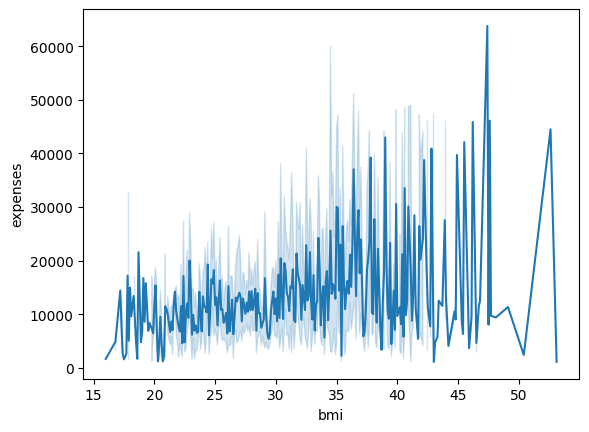

In [31]:
sns.lineplot(data=df,x='bmi',y='expenses')

In [32]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [33]:
cols=['age', 'sex', 'bmi', 'children', 'smoker']
X=df[cols]

In [34]:
X.head()

,age,sex,bmi,children,smoker
0,19,female,27.9,0,yes
1,18,male,33.8,1,no
2,28,male,33.0,3,no
3,33,male,22.7,0,no
4,32,male,28.9,0,no


In [35]:
y=df["expenses"]

In [36]:
y.head()

0    16884.92
1     1725.55
2     4449.46
3    21984.47
4     3866.86
Name: expenses, dtype: float64

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Scaling

In [40]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
cols=['age','bmi','children']

In [41]:
X_train[cols]=scalar.fit_transform(X_train[cols])

In [43]:
X_test[cols]=scalar.transform(X_test[cols])

Encoding

In [44]:
from sklearn.preprocessing import OrdinalEncoder
encoder=OrdinalEncoder()
cols = ['sex','smoker']


In [45]:
X_train[cols]=encoder.fit_transform(X_train[cols])

In [46]:
X_test[cols]=encoder.transform(X_test[cols])

In [47]:
X_train.head()

,age,sex,bmi,children,smoker
1114,0.108696,1.0,0.229111,0.0,0.0
968,0.065217,1.0,0.261456,0.4,0.0
599,0.739130,0.0,0.579515,0.4,0.0
170,0.978261,1.0,0.687332,0.0,0.0
275,0.630435,0.0,0.285714,0.4,0.0


Model Building

In [57]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(criterion = 'squared_error',max_depth = 6, n_estimators = 10)

In [58]:
model.fit(X_train,y_train)

,n_estimators,10
,criterion,'squared_error'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [59]:
pred_train=model.predict(X_train)
pred_test=model.predict(X_test)

In [60]:
from sklearn.metrics import r2_score

In [63]:
print('Training Set Score:',r2_score(y_train,pred_train))
print('Testing Set Score:',r2_score(y_test,pred_test))

Training Set Score: 0.8907765627049704
Testing Set Score: 0.8970848179676273


Pipeline building

In [72]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
preprocessor=ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), ['age', 'bmi', 'children']),
        ('cat', OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1), ['sex', 'smoker'])
    ],remainder='passthrough'
)

In [73]:
final_pipeline=Pipeline(steps=[('preprocessor',preprocessor),('regressor',model)])

In [74]:
X_new_single_row = pd.DataFrame({
    'age': [35],
    'sex': ['male'],
    'bmi': [27.0],
    'children': [1],
    'smoker': ['no'],
    'region': ['southwest']
})

In [76]:
final_pipeline.fit(X_train,y_train)

,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [78]:
pred=final_pipeline.predict(X_new_single_row)

In [79]:
type(pred)

numpy.ndarray

SAVING THE MODEL

In [ ]:
import joblib 
filename='insaurance.joblib'

with open(filename,'wb') as f:
    joblib.dump(final_pipeline,f)

print(f"Pipeline saved successfully as {filename}")

Pipeline saved successfully as insaurance.joblib


In [ ]:
# LOW_RISK_THRESHOLD = 12000
# MEDIUM_RISK_THRESHOLD = 30000

# def classify_insurance_risk(predicted_charge):
#     """
#     Classifies a predicted insurance charge amount into a risk category level.

#     This function uses pre-defined thresholds based on common distribution analysis
#     (EDA) of the Kaggle Medical Cost Personal Datasets, where costs are highly 
#     skewed and often cluster around low, medium, and high tiers.

#     Args:
#         predicted_charge (float or array-like): The estimated annual medical 
#                                                 cost (charge/expense).

#     Returns:
#         str or list: The corresponding risk category level(s).
#     """

#     if isinstance(predicted_charge, (list, np.ndarray)):
#         # Handle multiple predictions (e.g., from model.predict())
#         return [_get_category_for_charge(charge) for charge in predicted_charge]
#     else:
#         # Handle a single prediction
#         return _get_category_for_charge(predicted_charge)

# def _get_category_for_charge(charge):
#     """Helper function to assign category based on a single charge value."""
#     if charge < LOW_RISK_THRESHOLD:
#         return "Standard (Tier 1)"
#     elif charge < MEDIUM_RISK_THRESHOLD:
#         return "Elevated Risk (Tier 2)"
#     else:
#         return "High-Risk/Complex Case (Tier 3)"